# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [83]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [84]:

cluster = KMeans(n_clusters=8)
customers_clusters = cluster.fit(X)
#X = StandardScaler().fit_transform(X)

y1_pred = cluster.labels_.astype(np.int)

print(silhouette_score(X, y1_pred))


0.5406824747857623


In [85]:
#plt.scatter(X[:, 0], X[:, 1], c=y1_pred)

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [86]:

cluster = KMeans(n_clusters=5)
customers_clusters = cluster.fit(X)
#X = StandardScaler().fit_transform(X)

y1_pred = cluster.labels_.astype(np.int)

print(silhouette_score(X, y1_pred))


0.5489993239795687


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [87]:

cluster = KMeans(n_clusters=3)
customers_clusters = cluster.fit(X)
#X = StandardScaler().fit_transform(X)

y1_pred = cluster.labels_.astype(np.int)

print(silhouette_score(X, y1_pred))


0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

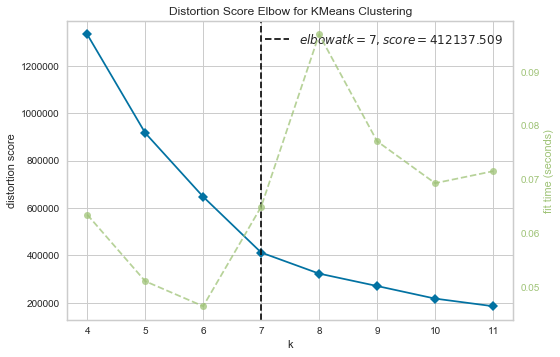

In [88]:
from yellowbrick.cluster import KElbowVisualizer


model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X)
visualizer.poof()

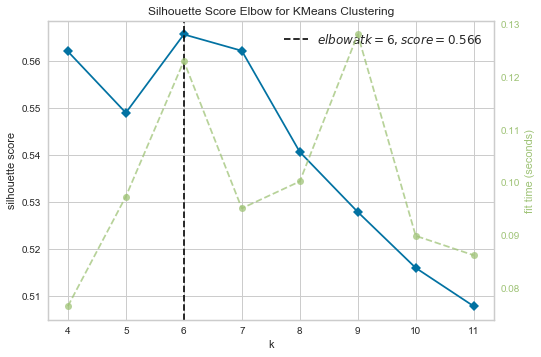

In [89]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric = 'silhouette')
visualizer.fit(X)
visualizer.poof()

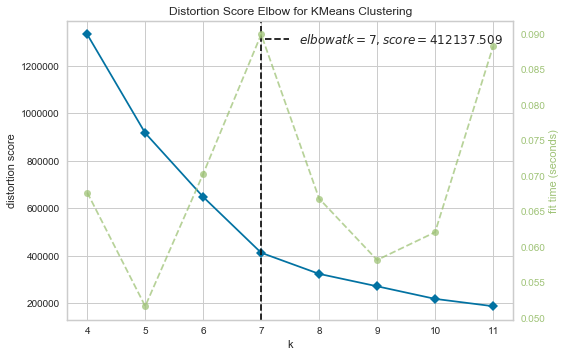

In [90]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric ='distortion')
visualizer.fit(X)
visualizer.poof()

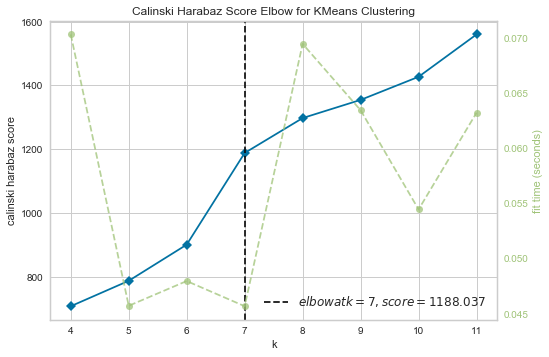

In [102]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric= 'calinski_harabasz')
visualizer.fit(X)
visualizer.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

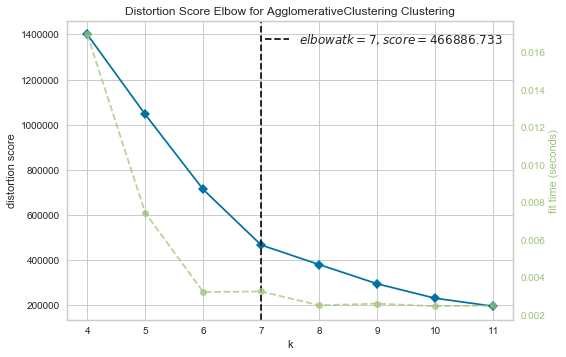

In [92]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(4,12),metric = 'distortion')
visualizer.fit(X)
visualizer.poof()

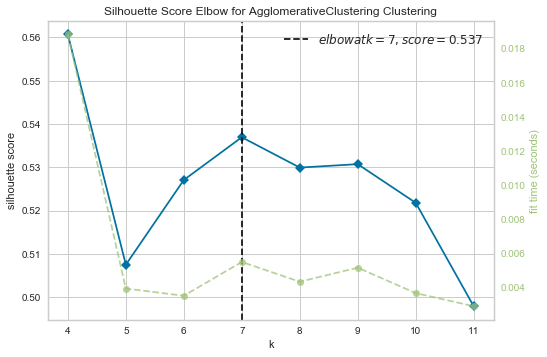

In [103]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(4,12),metric = 'silhouette')
visualizer.fit(X)
visualizer.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [107]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [122]:
X.shape

(178, 14)

(7, 14)


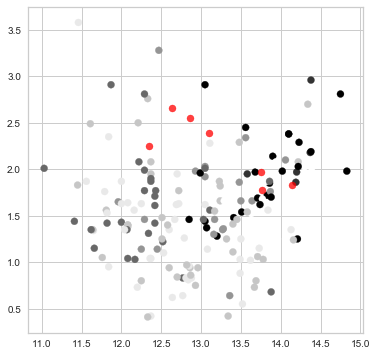

In [180]:
from sklearn.daasets import make_blobs
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 7)
kmeans.fit(X)
y_pred = kmeans.predict(X)
X['predictions'] = y_pred


plt.figure(figsize=(6,6))
plt.scatter(X['alcohol'], X['proanthocyanins'], c= X['predictions'])

centers = kmeans.cluster_centers_
print(centers.shape)
#print(centers[2])
plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=0.75)

plt.show()

/Users/admin/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/admin/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


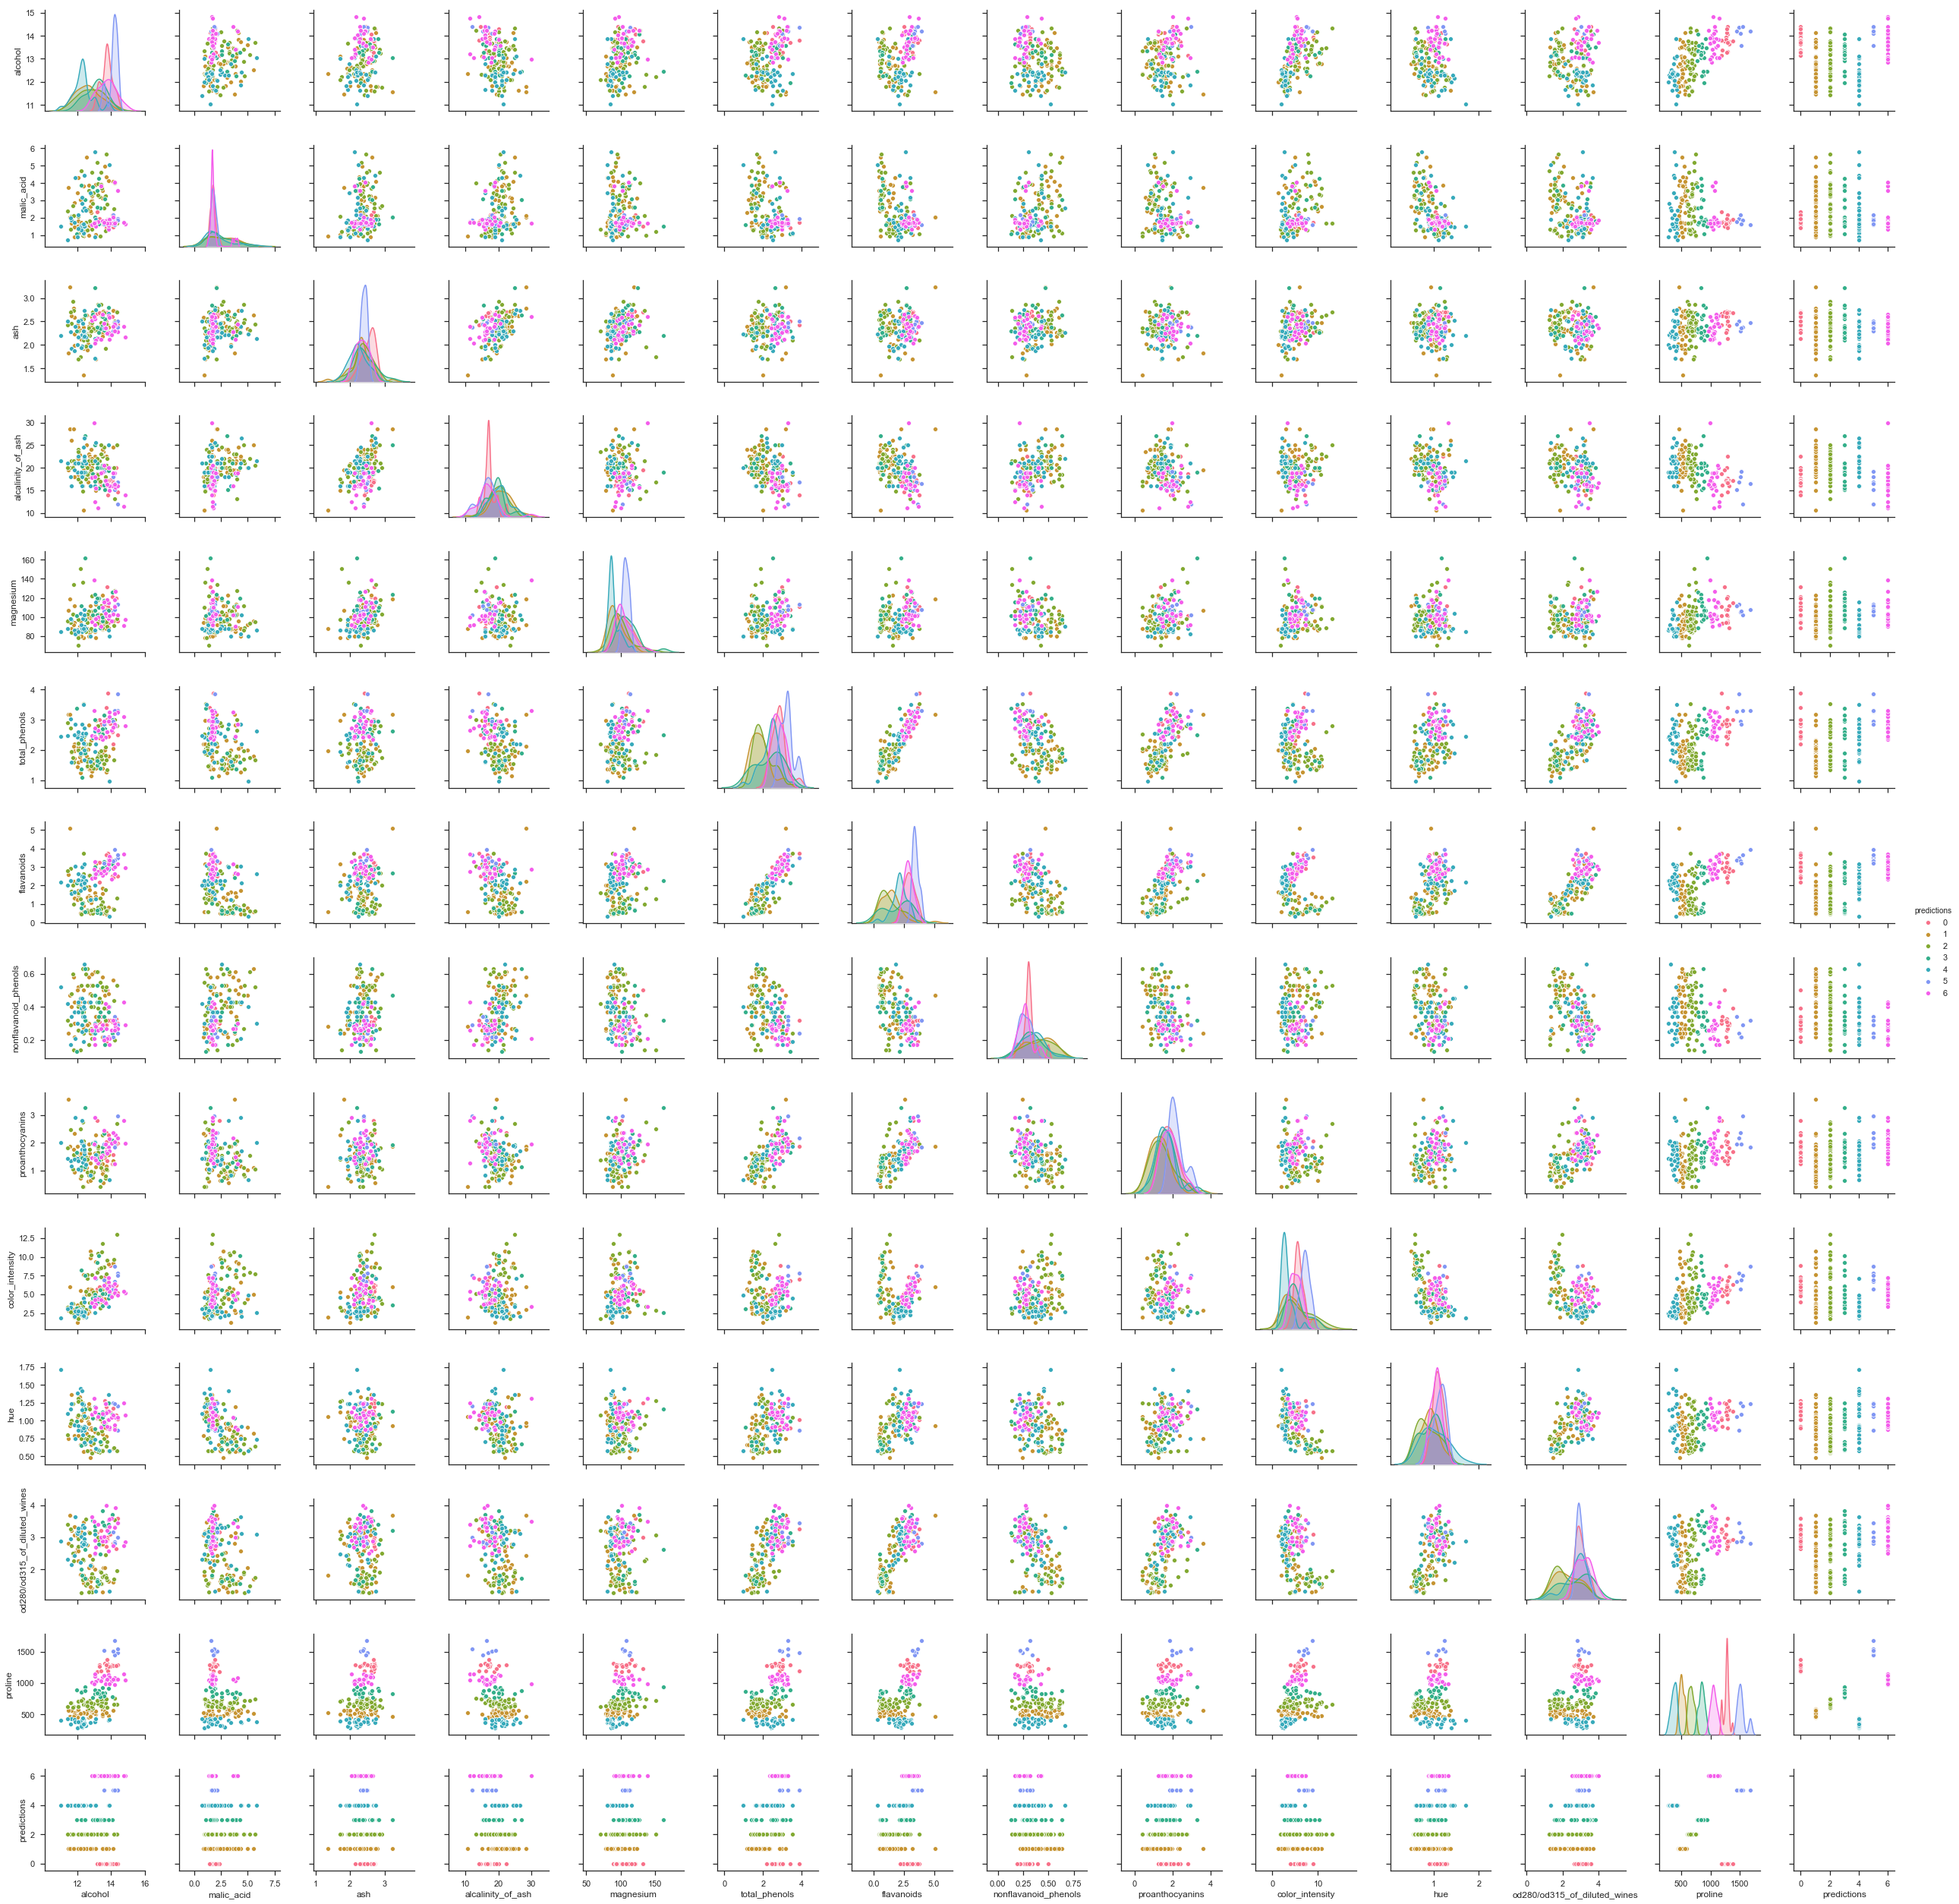

In [183]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

g = sns.pairplot(X, hue = "predictions", palette="husl")

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

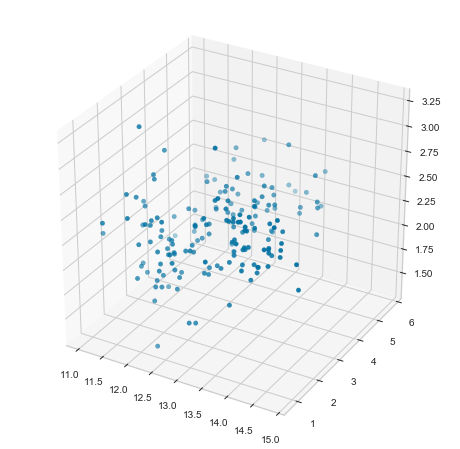

In [133]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R


fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

ax.scatter(X['alcohol'], X['malic_acid'], X['ash'])
#ax.set_xlim(-4, 4)
#ax.set_ylim(-4, 4)
#ax.set_zlim(-4, 4)

#ax.view_init(elev=20, azim=65)
plt.show()

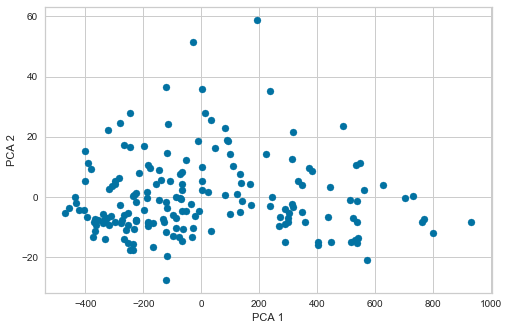

In [171]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

fig = plt.figure(figsize=(8,8))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4)]

#pca_X
ax[0].scatter(pca_X[:,0], pca_X[:,1])
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

plt.show()

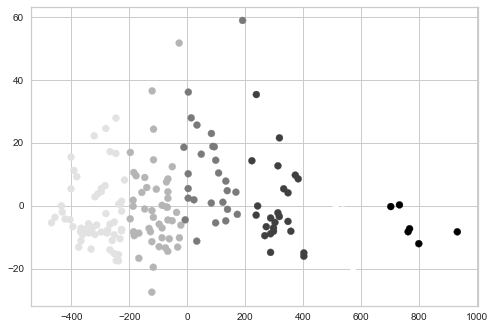

In [172]:
import pylab as pl
pl.scatter(pca_X[:,0], pca_X[:,1], c=X.predictions)


In [173]:
pca_X.shape[0]
X.predictions.unique()


array([4, 0, 5, 3, 2, 1])

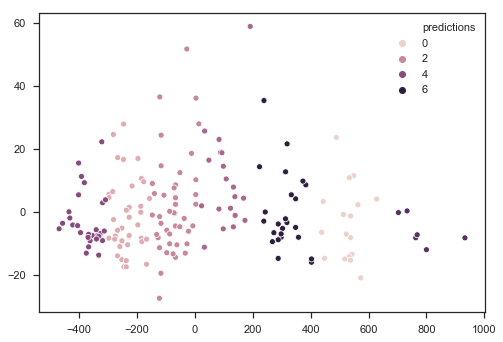

In [188]:
sns.scatterplot(pca_X[:,0], pca_X[:,1], hue = X["predictions"])

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

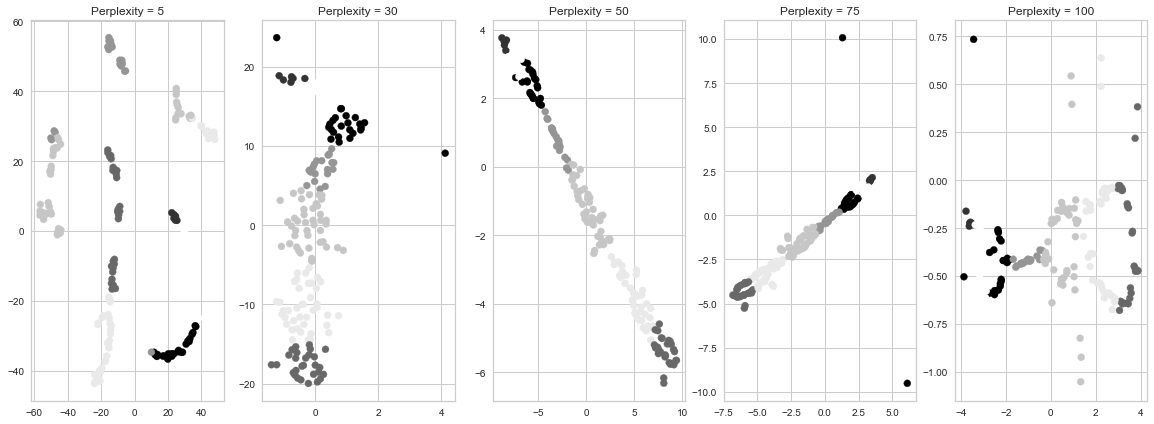

In [181]:
from sklearn.manifold import TSNE


fig, ax = plt.subplots(1, 5, figsize=(20, 7))
for i, perp in enumerate([5, 30, 50, 75, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=X['predictions'])
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()